In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_parquet("D:\\MSIB\\Final Project\\new_dataset.parquet")

In [3]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,104910,0,Cash loans,M,0,135000,454500.0,454500.0,Working,Higher education,...,5625.000000,5625.000000,76160.882812,112500,5625.000000,76160.882812,20.0,Active,0,0
1,114543,0,Cash loans,F,0,85500,360000.0,360000.0,Working,Secondary / secondary special,...,4298.220215,4298.220215,458011.125000,450000,22510.980469,456665.625000,35.0,Active,0,0
2,150434,1,Cash loans,M,0,270000,755190.0,675000.0,Commercial associate,Secondary / secondary special,...,221.220001,221.220001,152298.625000,225000,11594.565430,151192.171875,29.0,Active,0,0
3,139581,1,Cash loans,M,0,157500,401386.5,346500.0,Working,Secondary / secondary special,...,6750.000000,6750.000000,132064.250000,135000,6750.000000,131168.750000,33.0,Active,0,0
4,118505,1,Cash loans,F,0,234000,285723.0,238500.0,Commercial associate,Secondary / secondary special,...,5936.354980,2250.000000,117962.773438,135000,5979.194824,117962.773438,5.0,Active,0,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 43 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   SK_ID_CURR                  int32   
 1   TARGET                      int32   
 2   NAME_CONTRACT_TYPE          category
 3   CODE_GENDER                 category
 4   CNT_CHILDREN                int8    
 5   AMT_INCOME_TOTAL            int32   
 6   AMT_CREDIT                  float32 
 7   AMT_GOODS_PRICE             float32 
 8   NAME_INCOME_TYPE            category
 9   NAME_EDUCATION_TYPE         category
 10  NAME_FAMILY_STATUS          category
 11  AGE                         int8    
 12  OCCUPATION_TYPE             category
 13  CNT_FAM_MEMBERS             int8    
 14  WEEKDAY_APPR_PROCESS_START  category
 15  SK_ID_BUREAU                float32 
 16  CREDIT_ACTIVE               category
 17  CREDIT_CURRENCY             category
 18  CREDIT_DAY_OVERDUE          float32 
 19  

In [5]:
TARGET = df1['TARGET']
TARGET.value_counts()

0    1250000
1    1250000
Name: TARGET, dtype: int64

## One-Hot Encoding

In [6]:
df1_before = df1.copy()

df1 = pd.get_dummies(df1)
print ('One-hot encoding completed!\n')
print ('Shape before: ', df1_before.shape)
print ('Shape after: ', df1.shape)

One-hot encoding completed!

Shape before:  (2500000, 43)
Shape after:  (2500000, 151)


## Splitting the dataset

In [7]:
!pip install scikit-learn

In [8]:
#data validation into split test & test
y= df1['TARGET']
X= df1.drop(['TARGET'],1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=123)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9316\4043094809.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= df1.drop(['TARGET'],1)


## Logistic Regression

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [10]:
# Misalkan Anda memiliki data pelatihan 'X_train' dan target 'y_train'
# dan ingin menggunakan model Logistic Regression

# Membuat objek model Logistic Regression
model = LogisticRegression()

# Membuat objek KFold dengan 3 lipatan
kfold = KFold(n_splits=3)

# Melakukan cross validation dengan model Logistic Regression
scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Menampilkan hasil evaluasi kinerja model pada setiap lipatan
print("Hasil Cross Validation (akurasi): ", scores)

# Menampilkan rata-rata dan standar deviasi dari hasil cross validation
print("Rata-rata akurasi: ", scores.mean())
print("Standar deviasi akurasi: ", scores.std())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Hasil Cross Validation (akurasi):  [0.62819414 0.62485236 0.62788836]
Rata-rata akurasi:  0.6269782850195119
Standar deviasi akurasi:  0.0015084324505678264


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [12]:
#Tentukan model Logistic Regression
model = LogisticRegression()

# Tentukan dictionary dari hyperparameter yang ingin Anda tuning dan nilai-nilai yang ingin Anda coba
param_grid = {
    'C': [0.1, 1.0, 10.0]
    #'penalty': ['l1', 'l2'],
    #'solver': ['liblinear', 'saga']
}


# Buat objek GridSearchCV dengan model, parameter grid, dan jumlah lipatan cross-validation yang diinginkan
grid_search = GridSearchCV(model, param_grid, cv=3)

# Lakukan fit dengan data pelatihan untuk mencari kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Melihat hasil terbaik dan parameter yang menghasilkannya
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best parameters:  {'C': 1.0}
Best score:  0.6282388579315119


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Tentukan model Logistic Regression
model = LogisticRegression()

# Tentukan dictionary dari hyperparameter yang ingin Anda tuning dan nilai-nilai yang ingin Anda coba
param_grid = {
    #'C': [0.1, 1.0, 10.0]
    'penalty': ['l1', 'l2'],
    #'solver': ['liblinear', 'saga']
}


# Buat objek GridSearchCV dengan model, parameter grid, dan jumlah lipatan cross-validation yang diinginkan
grid_search = GridSearchCV(model, param_grid, cv=3)

# Lakukan fit dengan data pelatihan untuk mencari kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Melihat hasil terbaik dan parameter yang menghasilkannya
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best parameters:  {'penalty': 'l2'}
Best score:  0.6282388579315119


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#Tentukan model Logistic Regression
model = LogisticRegression()

# Tentukan dictionary dari hyperparameter yang ingin Anda tuning dan nilai-nilai yang ingin Anda coba
param_grid = {
    #'C': [0.1, 1.0, 10.0],
    #'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


# Buat objek GridSearchCV dengan model, parameter grid, dan jumlah lipatan cross-validation yang diinginkan
grid_search = GridSearchCV(model, param_grid, cv=3)

# Lakukan fit dengan data pelatihan untuk mencari kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Melihat hasil terbaik dan parameter yang menghasilkannya
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters:  {'solver': 'saga'}
Best score:  0.6316560008007386


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membuat objek model Logistic Regression dengan parameter-parameter yang disarankan
model = LogisticRegression(C=1.0, penalty='l2', solver='saga')

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Memprediksi data uji dengan model yang telah dilatih
y_pred = model.predict(X_test)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Akurasi:  0.6341506666666666


## Model Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

In [13]:
# Membuat objek model Naive Bayes
model = GaussianNB()

# Membuat objek KFold dengan 3 lipatan
kfold = KFold(n_splits=3)

# Melakukan cross validation dengan model Naive Bayes
scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Menampilkan hasil evaluasi kinerja model pada setiap lipatan
print("Hasil Cross Validation (akurasi): ", scores)

# Menampilkan rata-rata dan standar deviasi dari hasil cross validation
print("Rata-rata akurasi: ", scores.mean())
print("Standar deviasi akurasi: ", scores.std())

Hasil Cross Validation (akurasi):  [0.59651932 0.59529805 0.59607977]
Rata-rata akurasi:  0.595965713969369
Standar deviasi akurasi:  0.000505059578458796


In [14]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituned
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Buat objek GridSearchCV dengan model Naive Bayes dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=kfold)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan hasil grid search terbaik
print("Parameter terbaik: ", grid_search.best_params_)
print("Akurasi terbaik: ", grid_search.best_score_)

Parameter terbaik:  {'var_smoothing': 1e-08}
Akurasi terbaik:  0.6028857140954142


In [16]:
# Membuat objek model Naive Bayes
model = GaussianNB(var_smoothing=1e-08)

# Membuat objek KFold dengan 3 lipatan
kfold = KFold(n_splits=3)

# Melakukan cross validation dengan model Naive Bayes
scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Menampilkan hasil evaluasi kinerja model pada setiap lipatan
print("Hasil Cross Validation (akurasi): ", scores)

# Menampilkan rata-rata dan standar deviasi dari hasil cross validation
print("Rata-rata akurasi: ", scores.mean())
print("Standar deviasi akurasi: ", scores.std())

Hasil Cross Validation (akurasi):  [0.60321874 0.60245863 0.60297977]
Rata-rata akurasi:  0.6028857140954142
Standar deviasi akurasi:  0.00031736081096021774


## Neural Network Model

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score

In [10]:
# Membuat objek model Neural Network dengan 3 layer tersembunyi, masing-masing memiliki 10, 20, dan 10 node
model = MLPClassifier(hidden_layer_sizes=(10, 20, 10))

# Membuat objek KFold dengan 3 lipatan
kfold = KFold(n_splits=3)

# Melakukan cross validation dengan model Neural Network
scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Menampilkan hasil evaluasi kinerja model pada setiap lipatan
print("Hasil Cross Validation (akurasi): ", scores)

# Menampilkan rata-rata dan standar deviasi dari hasil cross validation
print("Rata-rata akurasi: ", scores.mean())
print("Standar deviasi akurasi: ", scores.std())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Hasil Cross Validation (akurasi):  [0.50042857 0.62374836 0.57155004]
Rata-rata akurasi:  0.5652423227507154
Standar deviasi akurasi:  0.050542278370406875


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituned
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 20,), (10, 20, 10,)]
    #'activation': ['logistic', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'learning_rate': ['constant', 'adaptive']
}

# Buat objek GridSearchCV dengan model Neural Network dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=kfold)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan hasil grid search terbaik
print("Parameter terbaik: ", grid_search.best_params_)
print("Akurasi terbaik: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituned
param_grid = {
    #'hidden_layer_sizes': [(10,), (20,), (10, 20,), (10, 20, 10,)],
    'activation': ['logistic', 'relu']
    #'solver': ['sgd', 'adam'],
    #'learning_rate': ['constant', 'adaptive']
}

# Buat objek GridSearchCV dengan model Neural Network dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=kfold)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)
# Menampilkan hasil grid search terbaik
print("Parameter terbaik: ", grid_search.best_params_)
print("Akurasi terbaik: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituned
param_grid = {
    #'hidden_layer_sizes': [(10,), (20,), (10, 20,), (10, 20, 10,)],
    #'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam']
    #'learning_rate': ['constant', 'adaptive']
}

# Buat objek GridSearchCV dengan model Neural Network dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=kfold)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)
# Menampilkan hasil grid search terbaik
print("Parameter terbaik: ", grid_search.best_params_)
print("Akurasi terbaik: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituned
param_grid = {
    #'hidden_layer_sizes': [(10,), (20,), (10, 20,), (10, 20, 10,)],
    #'activation': ['logistic', 'relu'],
    #'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}

# Buat objek GridSearchCV dengan model Neural Network dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=kfold)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)
# Menampilkan hasil grid search terbaik
print("Parameter terbaik: ", grid_search.best_params_)
print("Akurasi terbaik: ", grid_search.best_score_)

## LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold

# Membuat objek model LDA
model = LinearDiscriminantAnalysis()

# Membuat objek KFold dengan 3 lipatan
kfold = KFold(n_splits=3)

# Melakukan cross validation dengan model LDA
scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Menampilkan hasil evaluasi kinerja model pada setiap lipatan
print("Hasil Cross Validation (akurasi): ", scores)

# Menampilkan rata-rata dan standar deviasi dari hasil cross validation
print("Rata-rata akurasi: ", scores.mean())
print("Standar deviasi akurasi: ", scores.std())

Hasil Cross Validation (akurasi):  [0.78832538 0.78732559 0.78861988]
Rata-rata akurasi:  0.7880902855799433
Standar deviasi akurasi:  0.0005539242297135827


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Membuat objek model Linear Discriminant Analysis (LDA)
model = LinearDiscriminantAnalysis()

# Tentukan dictionary dari hyperparameter yang ingin Anda tuning dan nilai-nilai yang ingin Anda coba
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
    #'shrinkage': [None, 'auto', 0.1, 0.2, 0.3]
}

# Buat objek GridSearchCV dengan model, parameter grid, dan jumlah lipatan cross-validation yang diinginkan
grid_search = GridSearchCV(model, param_grid, cv=3)

# Lakukan fit dengan data pelatihan untuk mencari kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Melihat hasil terbaik dan parameter yang menghasilkannya
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 590, in fit
    self._solve_svd(X, y)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 472, in _solve_svd
    Xg = X[y == group, :]
numpy.core._exceptions._ArrayMemoryError: Unable to 

MemoryError: Unable to allocate 1001. MiB for an array with shape (874937, 150) and data type float64

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Membuat objek model Linear Discriminant Analysis (LDA)
model = LinearDiscriminantAnalysis()

# Tentukan dictionary dari hyperparameter yang ingin Anda tuning dan nilai-nilai yang ingin Anda coba
param_grid = {
    #'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.3]
}

# Buat objek GridSearchCV dengan model, parameter grid, dan jumlah lipatan cross-validation yang diinginkan
grid_search = GridSearchCV(model, param_grid, cv=3)

# Lakukan fit dengan data pelatihan untuk mencari kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Melihat hasil terbaik dan parameter yang menghasilkannya
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

# Inisialisasi model LDA
model = LinearDiscriminantAnalysis()

# Latih model dengan set pelatihan (X_train, y_train)
model.fit(X_train, y_train)

# Menghitung nilai prediksi probabilitas untuk kelas positif
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Menghitung ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

ROC AUC: 0.852825249997251


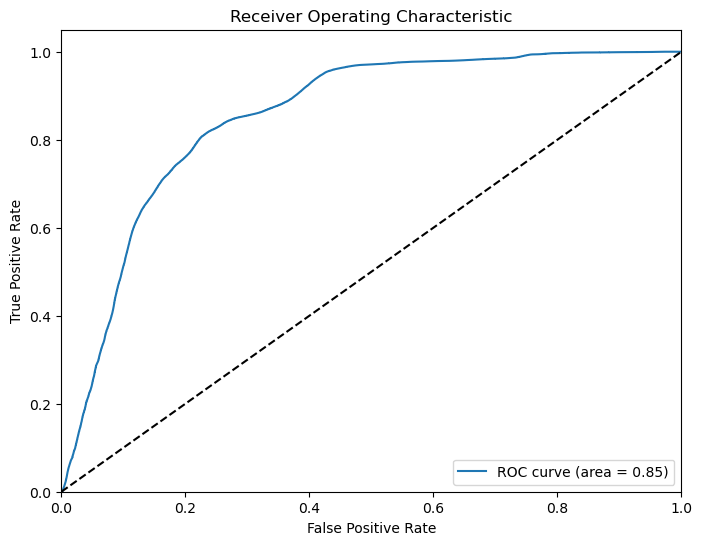

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Menghitung false positive rate (fpr) dan true positive rate (tpr) pada variasi threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Menghitung nilai AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Membuat plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inisialisasi model LDA
model = LinearDiscriminantAnalysis()

# Latih model dengan set pelatihan (X_train, y_train)
model.fit(X_train, y_train)

# Menghitung nilai prediksi probabilitas untuk kelas churn dan non-churn
pred_prob = model.predict_proba(X_test)

# Mengambil probabilitas churn dari hasil prediksi probabilitas
prob_churn = pred_prob[:, 1]  # Probabilitas churn (kelas positif)

# Menentukan threshold untuk prediksi churn
threshold = 0.5

# Menghitung jumlah churn dan non-churn berdasarkan threshold
churn_count = (prob_churn >= threshold).sum()
non_churn_count = (prob_churn < threshold).sum()

# Menghitung persentase churn dan non-churn
total_count = len(X_test)
churn_percentage = (churn_count / total_count) * 100
non_churn_percentage = (non_churn_count / total_count) * 100

# Menampilkan hasil
print("Total Churn: {} data ({}%)".format(churn_count, churn_percentage))
print("Total Non-Churn: {} data ({}%)".format(non_churn_count, non_churn_percentage))

Total Churn: 415334 data (55.37786666666666%)
Total Non-Churn: 334666 data (44.62213333333334%)


## Future Importance

In [15]:
import numpy as np

# Mendapatkan feature importance dari model
importance = model.coef_[0]

# Mengurutkan feature importance secara menurun
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Menampilkan top 15 feature importance
for feature_name, importance_score in zip(sorted_feature_names[:15], sorted_importance[:15]):
    print(feature_name, ":", importance_score)

OCCUPATION_TYPE_Low-skill Laborers : 2.282305796741512
CREDIT_CURRENCY_currency 1 : 2.22258188995978
OCCUPATION_TYPE_Cooking staff : 2.073249836824766
OCCUPATION_TYPE_Cleaning staff : 1.6260247692534724
OCCUPATION_TYPE_Secretaries : 1.4756279692166552
NAME_FAMILY_STATUS_Separated : 1.3911314121078522
OCCUPATION_TYPE_HR staff : 0.9860996724290217
WEEKDAY_APPR_PROCESS_START_SUNDAY : 0.7428134040878456
CHANNEL_TYPE_Regional / Local : 0.7233328448986235
OCCUPATION_TYPE_High skill tech staff : 0.6777334667541755
OCCUPATION_TYPE_Sales staff : 0.675669538545795
CHANNEL_TYPE_Credit and cash offices : 0.6569335503392476
STATUS_4 : 0.6063478944384412
WEEKDAY_APPR_PROCESS_START_TUESDAY : 0.33194508147202995
NAME_INCOME_TYPE_Commercial associate : 0.2739410844577534


In [26]:
import pandas as pd

# Melakukan prediksi probabilitas untuk data uji
proba_predictions = model.predict_proba(X_test)

# Mengambil probabilitas untuk kelas churn (1)
churn_probabilities = proba_predictions[:, 1]

# Membentuk DataFrame dengan kolom "SK_ID_CURR" dan "Churn Probability"
output_df = pd.DataFrame({'SK_ID_CURR': X_test['SK_ID_CURR'], 'Churn Probability': churn_probabilities})

# Menampilkan tabel output
output_df

,SK_ID_CURR,Churn Probability
248124,167447,0.591336
24829,121590,0.965230
1101939,143441,0.099042
1935740,118505,0.762892
2180986,177000,0.590873
...,...,...
2137887,189768,0.820387
187970,145500,0.048447
1151394,146196,0.241447
669866,146196,0.243901


In [30]:
# Memfilter data dengan probabilitas churn di bawah 50%
below_50 = output_df[output_df['Churn Probability'] < 0.5]

# Memfilter data dengan probabilitas churn di atas 50%
above_50 = output_df[output_df['Churn Probability'] >= 0.5]

# Menghitung jumlah orang dengan probabilitas churn di bawah 50%
count_below_50 = below_50.shape[0]

# Menghitung jumlah orang dengan probabilitas churn di atas 50%
count_above_50 = above_50.shape[0]

# Membentuk DataFrame output
output_summary = pd.DataFrame({'TARGET': ['0', '1'], 'count': [count_below_50, count_above_50]})

# Menampilkan tabel output
output_summary

,TARGET,count
0,0,334666
1,1,415334
